In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Tiền xử lý dữ liệu EDA

#### Load data set
Sử dụng bộ data set weastherAUS.csv

*chú thích data set:*

|Cột|Ý nghĩa|
|---|---|
|Date|Ngày ghi nhận dữ liệu|
|Location|Vị trí địa lý|
|MinTemp|Nhiệt độ tối thiểu trong ngày (được biết đến gần nhất)|
|MaxTemp|Nhiệt độ tối đa trong ngày (được biết đến gần nhất)|
|Rainfall|Lượng mưa trong 24 giờ đến 9 giờ sáng|
|Evaporation|Lượng bay hơi "Class A" trong 24 giờ đến 9 giờ sáng|
|Sunshine|Số giờ nắng trong 24 giờ đến nửa đêm|
|WindGustDir|Hướng gió mạnh nhất trong ngày|
|WindGustSpeed|Tốc độ gió mạnh nhất trong ngày|
|WindDir9am|Hướng gió lúc 9 giờ sáng|
|Humidity9am|Độ ẩm tương đối lúc 9 giờ sáng|
|Humidity3pm|Độ ẩm tương đối lúc 3 giờ chiều|
|Pressure9am|Áp suất khí quyển lúc 9 giờ sáng|
|Pressure3pm|Áp suất khí quyển lúc 3 giờ chiều|
|Cloud9am|Phần trăm bầu trời che phủ mây lúc 9 giờ sáng|
|Cloud3pm|Phần trăm bầu trời che phủ mây lúc 3 giờ chiều|
|Temp9am|Nhiệt độ lúc 9 giờ sáng|
|Temp3pm|Nhiệt độ lúc 3 giờ chiều|
|RainToday|Có mưa trong ngày hay không (Yes/No)|
|RainTomorrow|Dự báo có mưa vào ngày hôm sau hay không (Yes/No)|



In [2]:
df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_corr=df.copy()
data_corr= data_corr.apply(le.fit_transform)

In [7]:
data_corr.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,213,262,6,358,145,13,21,13,...,71,22,215,232,8,10,224,262,0,0
1,397,2,153,284,0,358,145,14,21,6,...,44,25,244,239,10,10,227,287,0,0
2,398,2,208,290,0,358,145,15,22,13,...,38,30,214,248,10,2,265,276,0,0
3,399,2,171,313,0,358,145,4,10,9,...,45,16,314,290,10,10,236,309,0,0
4,400,2,254,356,10,358,145,13,19,1,...,82,33,246,221,7,8,233,341,0,0


<Axes: >

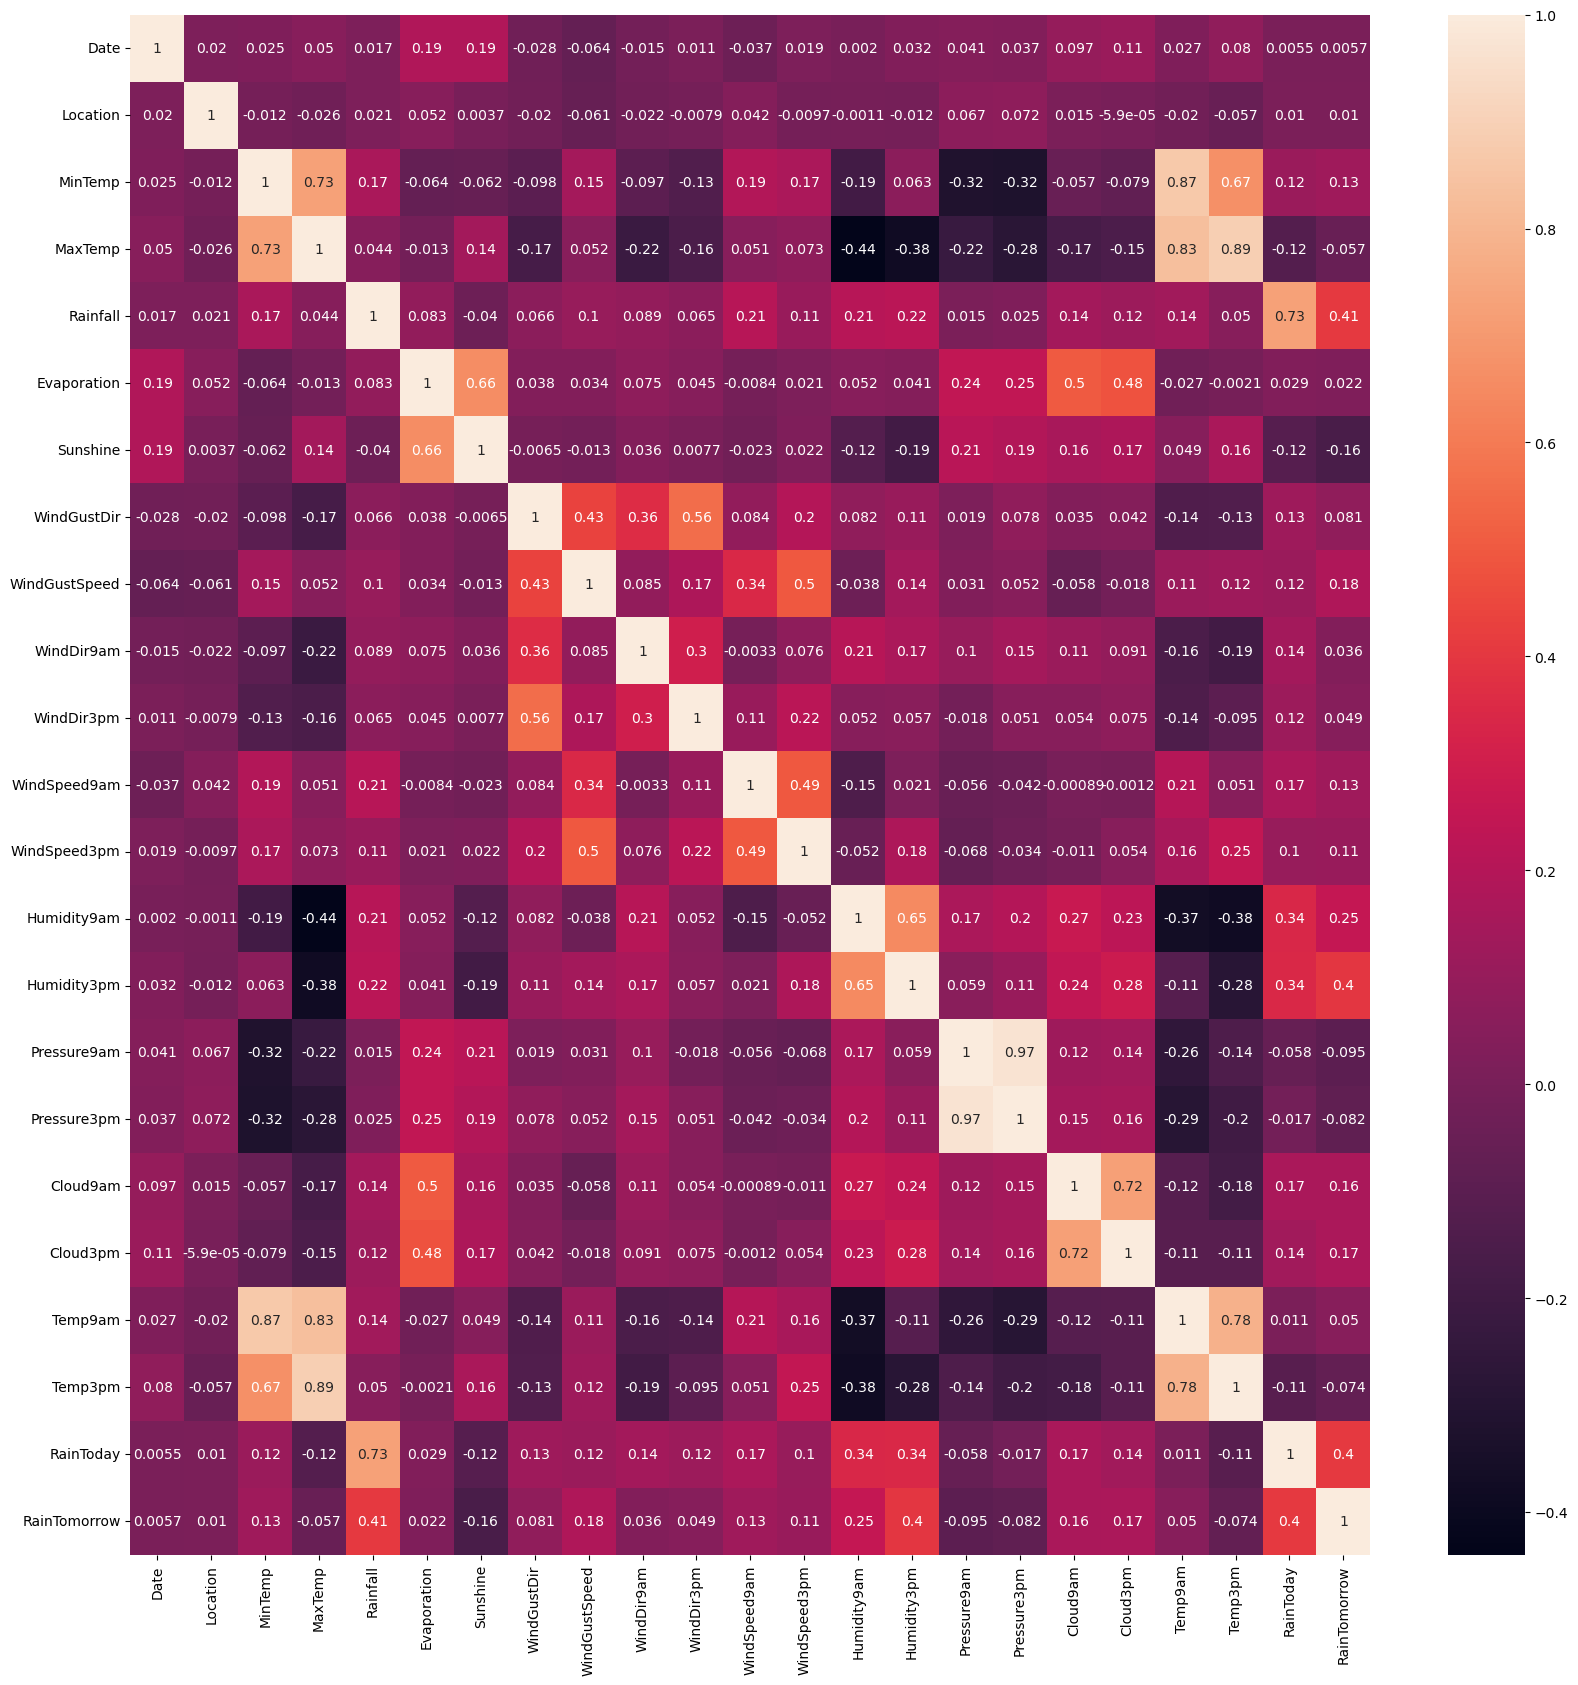

In [8]:
corr=data_corr.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)


Ta sẽ kiểm tra xem cột label (RainTomorrow) có bị null không, nếu có sẽ tiến hành drop các dòng null đi

In [9]:
df['RainTomorrow'].isna().sum()

3267

RainTomorrow bị null 3267 dòng, vậy nên ta sẽ drop 3267 dòng này đi

In [10]:
df = df.dropna(subset=['RainTomorrow'])
df.shape

(142193, 23)

In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Tiếp theo, ta sẽ xem cột label phân bố như thế nào

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

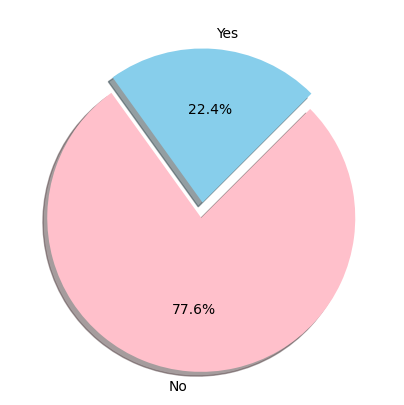

In [12]:
fig = plt.figure(figsize=(5,5))
colors = ["skyblue",'pink']
yes = df[df['RainTomorrow']=='Yes']
no = df[df['RainTomorrow']=='No']
ck = [yes['RainTomorrow'].count(),no['RainTomorrow'].count()]
piechart = plt.pie(ck,labels=["Yes","No"],
autopct ='%1.1f%%',
shadow = True,
colors = colors,
startangle = 45,
explode=(0, 0.1))
df.RainTomorrow.value_counts()

Nhận thấy cột `Date` nếu giữ nguyên mô hình sẽ không học được gì từ cột này, vì nó là ngày tháng năm, nên ta tiến hành tách nó ra thành 3 cột mới `Day`, `Month`, `Year` và drop cột `Date` đi

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date',axis=1,inplace=True)

Tiếp theo ta kiểm tra type của các cột, nếu có cột và phân loại thành:
- numerical
- categorical

để xử lý dữ liệu theo từng loại

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

chia dữ liệu theo loại thuộc tính

In [15]:
categorical = [var for var in df.columns if df[var].dtype=='O']
numerical = [var for var in df.columns if df[var].dtype!='O']
categorical, numerical

(['Location',
  'WindGustDir',
  'WindDir9am',
  'WindDir3pm',
  'RainToday',
  'RainTomorrow'],
 ['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm',
  'Year',
  'Month',
  'Day'])

Kiểm tra thống kê mô tả của các features numerical để kiểm tra xem chúng có bị outlier không.

In [16]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2012.758926,6.402544,15.715084
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


**Nhận xét:** ở đây ta thấy có 4 thuộc tính gồm `Rainfall`, `Evaporation`, `WindSpeed9am` và `WindSpeed3pm` có *max* vượt khá xa so với *Q3 (75%)* nên ta có quyền nghi ngờ 4 features này bị outliers 

Ta tiến hành vẽ boxplot kiểm tra:

Text(0, 0.5, 'WindSpeed3pm')

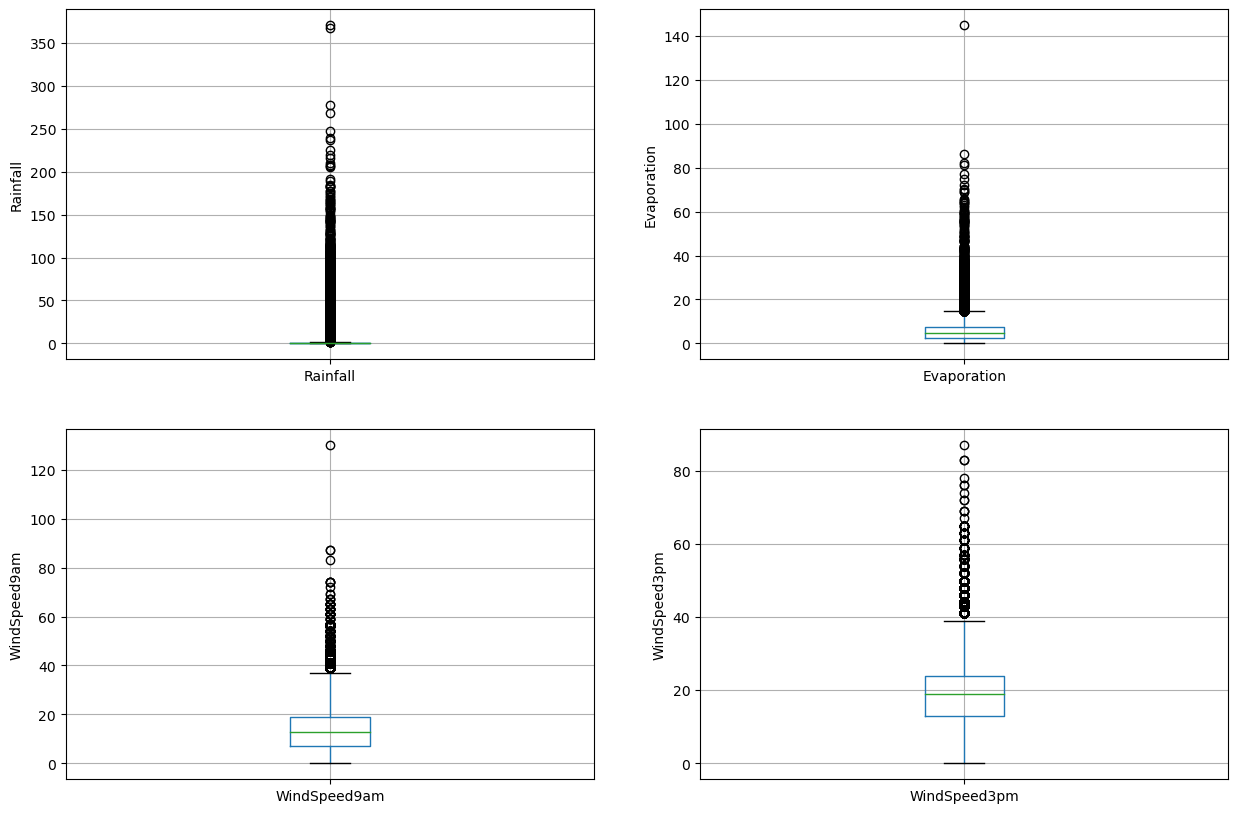

In [17]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

**Nhận xét:** qua biểu đồ trên, ta thấy cả 4 thuộc tính đều bị outlier, ta tiến hành remove outlier bằng cái đưa giá trị bị outlier về biên trên

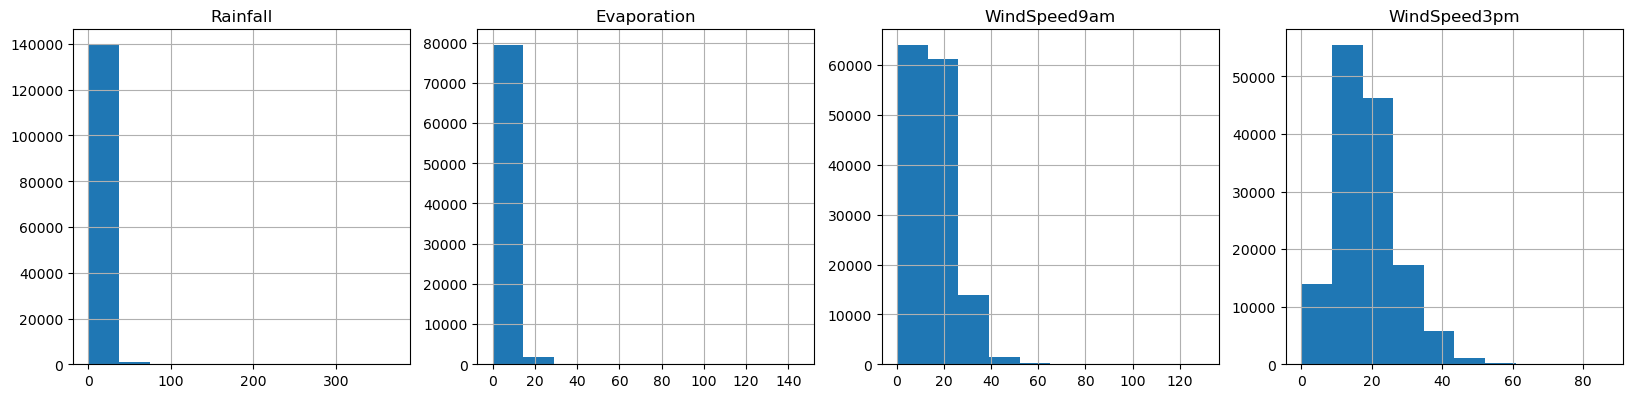

In [18]:
# kiểm tra phân phối của các biến số trong tập dữ liệu
plt.figure(figsize=(20,20))
numerical_nan = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
for i, col in enumerate(numerical_nan):
    plt.subplot(4, 4, i+1)
    df[col].hist()
    plt.title(col)
    # plt.savefig('output/numerical_distribution.png')

plt.show()
# save the figure

In [19]:
def calculate_fence(data, quantile=0.25, multiplier=1.5):
    q1 = data.quantile(quantile)
    q3 = data.quantile(1 - quantile)
    iqr = q3 - q1
    lower_fence = q1 - (iqr * multiplier)
    upper_fence = q3 + (iqr * multiplier)
    return [lower_fence, upper_fence]

Tiến hành remove outlier bằng cái đưa giá trị bị outlier về biên trên

In [20]:

outliers = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
def max_value(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

for i in outliers:
    fence = calculate_fence(df[i], multiplier=3)
    print(f'{i} outliers are values < {fence[0]} or > {fence[1]}')
for i in outliers:
    fence = calculate_fence(df[i], multiplier=3)
    df[i] = max_value(df, i, fence[1])

Rainfall outliers are values < -2.4000000000000004 or > 3.2
Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


Text(0, 0.5, 'WindSpeed3pm')

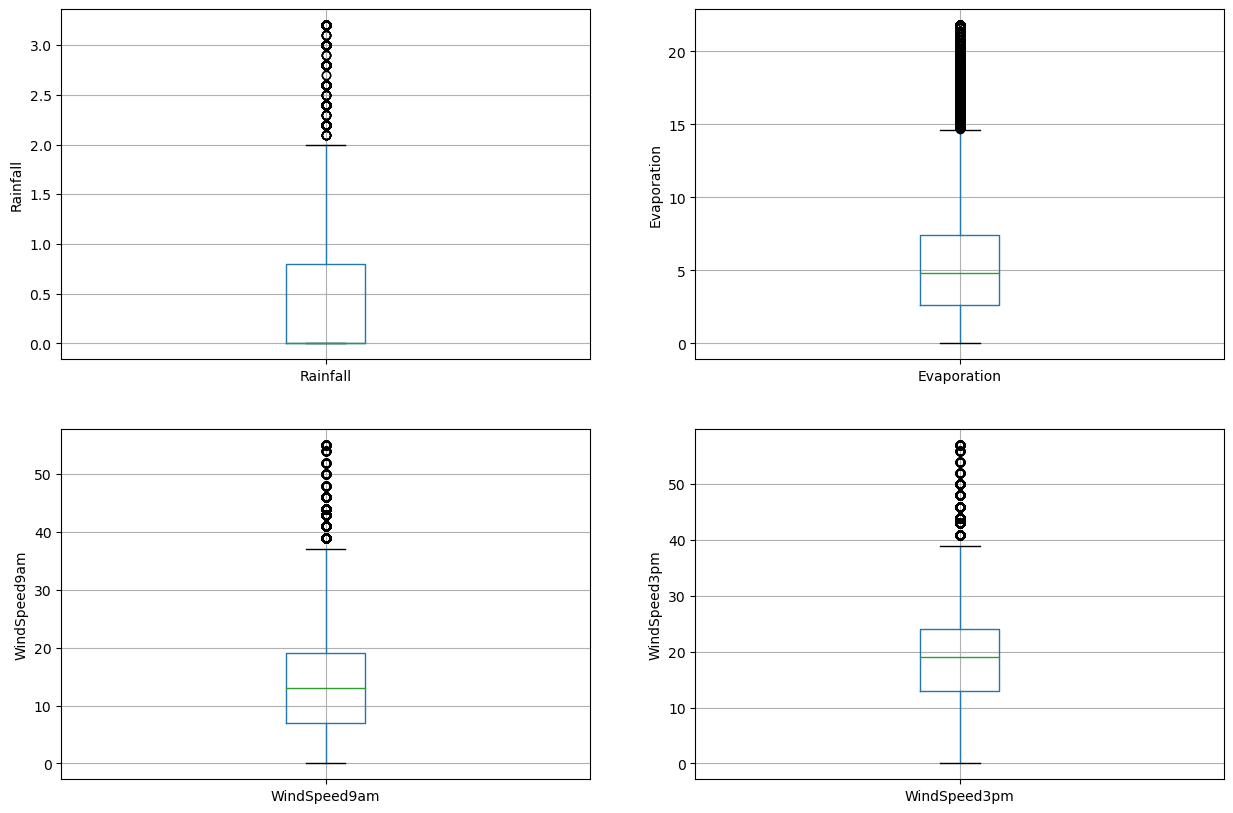

In [21]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

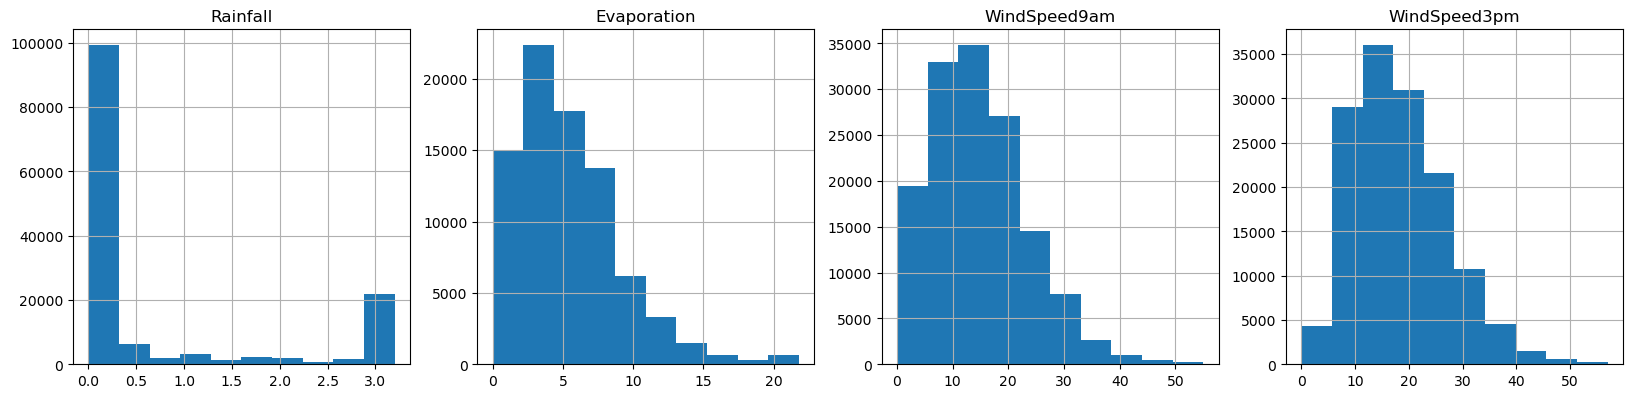

In [22]:
# kiểm tra phân phối của các biến số trong tập dữ liệu
plt.figure(figsize=(20,20))
numerical_nan = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
for i, col in enumerate(numerical_nan):
    plt.subplot(4, 4, i+1)
    df[col].hist()
    plt.title(col)
    # plt.savefig('output/numerical_distribution.png')

plt.show()
# save the figure

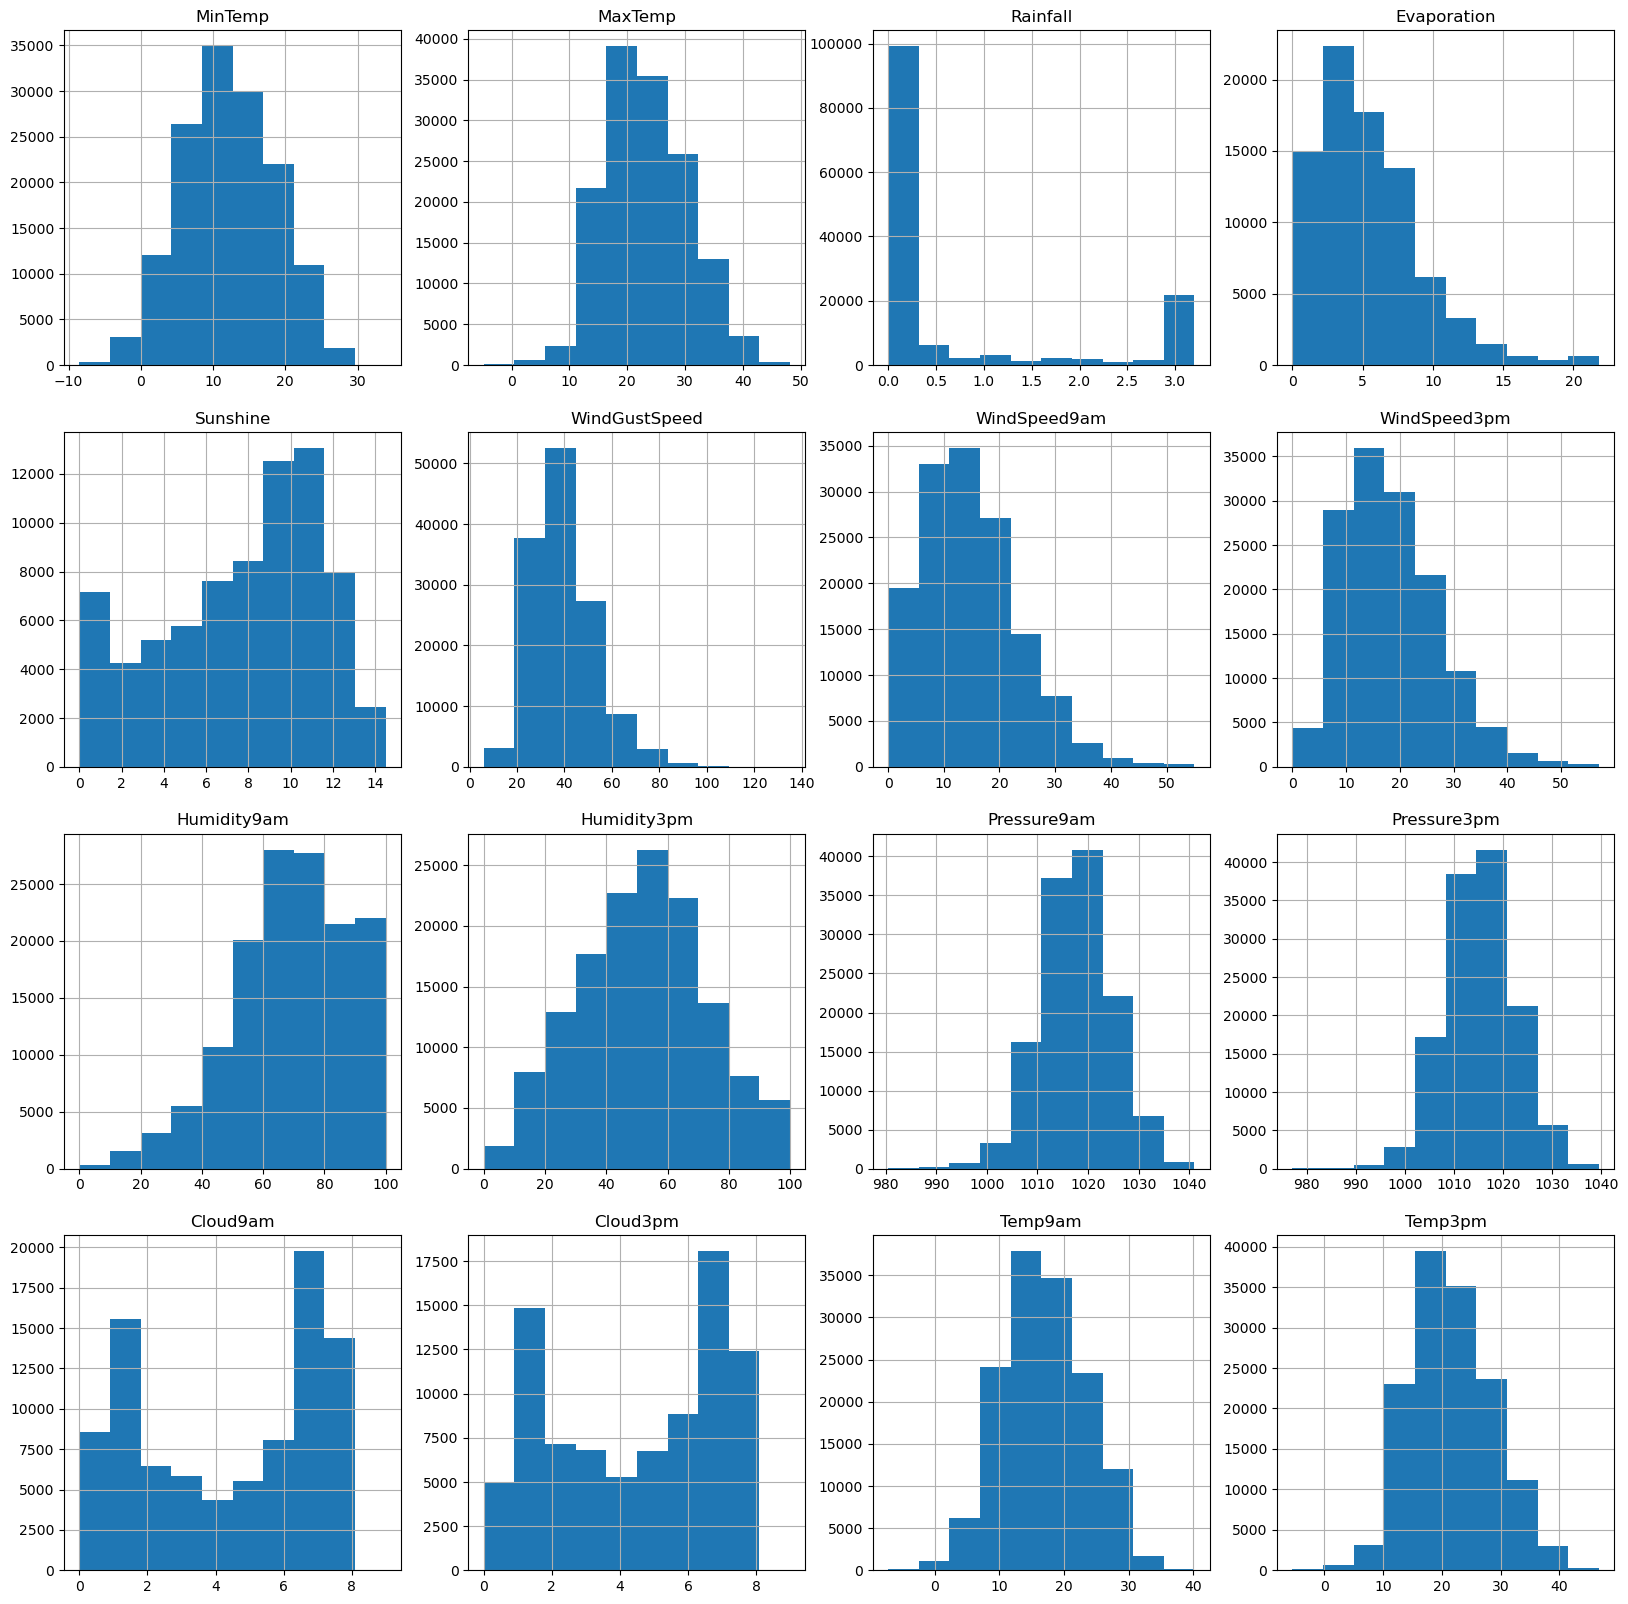

In [23]:
# kiểm tra phân phối của các biến số trong tập dữ liệu
plt.figure(figsize=(20,20))
numerical_nan = [var for var in numerical if df[var].isnull().sum()>0]
for i, col in enumerate(numerical_nan):
    plt.subplot(4, 4, i+1)
    df[col].hist()
    plt.title(col)
    # plt.savefig('output/numerical_distribution.png')

plt.show()
# save the figure

## Xử lý dữ liệu bị thiếu và one hot encodeing dữ liệu categorical

In [24]:
df[numerical].isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [25]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [26]:
df[categorical].isna().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [27]:
df[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [28]:
for var in numerical:
    df[var].fillna(df[var].median(), inplace=True)

In [29]:
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [30]:
for var in categorical:
    df[var].fillna(df[var].mode()[0], inplace=True)

In [31]:
df[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [32]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,0.675580,5.145828,8.042236,39.920123,13.988030,18.640341,68.858235,51.495742,1017.648460,1015.252481,4.649568,4.702658,16.985681,21.675977,2012.758926,6.402544,15.715084
std,6.388936,7.109617,1.184153,2.813565,2.769638,13.140632,8.825786,8.701679,18.932512,20.532227,6.746267,6.681810,2.294357,2.118753,6.472206,6.871243,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [33]:
df[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [34]:
df = pd.get_dummies(df, columns=categorical, drop_first=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,1,0,0,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,1,0,0
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
cols = df.columns

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)


In [37]:
df = pd.DataFrame(df, columns=[cols])


In [38]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,0.487867,0.529780,0.211119,0.236047,0.554637,0.262947,0.254328,0.327024,0.688582,0.514957,...,0.067500,0.101559,0.064293,0.056332,0.064574,0.069701,0.060875,0.065608,0.221213,0.224181
std,0.150682,0.134397,0.370048,0.129063,0.191009,0.101865,0.160469,0.152661,0.189325,0.205322,...,0.250886,0.302069,0.245275,0.230562,0.245774,0.254643,0.239102,0.247597,0.415065,0.417043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.429112,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.483491,0.517958,0.000000,0.220183,0.586207,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.596698,0.623819,0.187500,0.247706,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train model

Chia dữ liệu thành 2 tập `Train` và `Test`, sau đó tiếp tục chia tập `Train` ra thành `Train` và `Valid`

In [39]:
# split data
X = df.drop('RainTomorrow_Yes', axis=1)
y = df['RainTomorrow_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

/tmp/ipykernel_28/3813926713.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop('RainTomorrow_Yes', axis=1)


In [87]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report, roc_auc_score


In [41]:
from sklearn.model_selection import GridSearchCV

In [46]:
import sklearn.metrics as metrics
import time

In [43]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [53]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True, feature_importance=False):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("\n\n\nModel Report: \n")

    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    # plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

    print(classification_report(y_test,y_pred,digits=5))
    cm = confusion_matrix(y_test, y_pred)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    
    if feature_importance:
        plt.figure(figsize=(20,8))        
        feat_imp = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)[:15]
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

    return model, accuracy, roc_auc, time_taken

AUC Score là một phương pháp để đánh giá hiệu suất của mô hình phân loại dựa trên diện tích nằm dưới đường cong ROC. Giá trị AUC Score càng gần 1 thể hiện mô hình có khả năng phân loại tốt.

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Locati

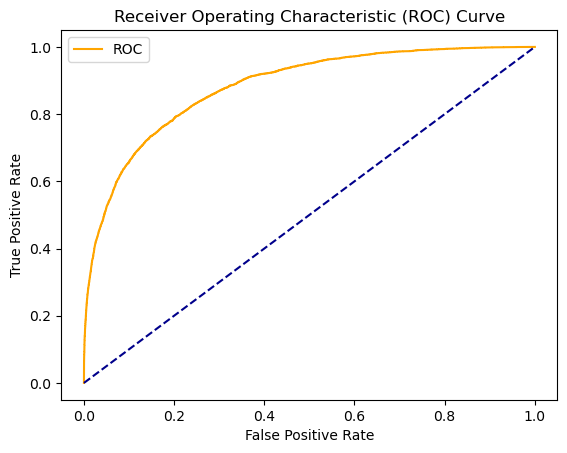

              precision    recall  f1-score   support

         0.0    0.87505   0.94886   0.91046     22098
         1.0    0.74760   0.52783   0.61878      6341

    accuracy                        0.85499     28439
   macro avg    0.81133   0.73835   0.76462     28439
weighted avg    0.84663   0.85499   0.84543     28439



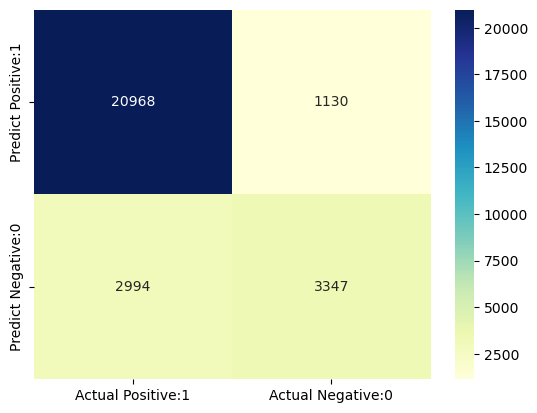

In [55]:
# predictors = [x for x in train.columns if x not in [target, IDcol]]
predictors = cols.to_list()
predictors.remove('RainTomorrow_Yes')
print(predictors)
# predictors.remove('RainTomorrow_Yes')
xgb1 = xgb.XGBClassifier(
    learning_rate =0.1,
    n_estimators=140,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    tree_method='gpu_hist',
    seed=27)
xgb1, accuracy_xgb1, roc_auc_xgb1, tt_xgb1 = run_model(xgb1, X_train, y_train, X_test, y_test)

## Điều chỉnh tham số của mô hình

Ở giai đoạn này, ta tiến hành điều chỉnh các tham số của mô hình XGBoost. Bằng cách điều chỉnh từng tham số một, ta có thể quan sát xem các siêu tham số (hyperparameters) tác động như thế nào đến hiệu suất của mô hình.

Khi điều chỉnh nhiều tham số cùng một lúc, có thể gây khó khăn trong việc xác định tham số nào đóng góp nhiều vào cải thiện hiệu suất. Nếu ta điều chỉnh nhiều tham số cùng lúc, sự tương tác giữa các tham số có thể làm mất đi sự rõ ràng về tác động của từng tham số đối với kết quả cuối cùng.

Bằng cách điều chỉnh từng tham số một, ta có thể xác định rõ ràng các tham số nào có ảnh hưởng lớn đến hiệu suất mô hình. Sau đó, ta có thể tập trung vào điều chỉnh những tham số này và tiếp tục quá trình tìm kiếm và tối ưu hóa. Việc này giúp ta có một quá trình điều chỉnh tham số hiệu quả hơn và tìm ra bộ tham số tối ưu cho mô hình XGBoost.

### Điều chỉnh `max_depth` và `min_child_weight`

In [62]:
from sklearn.model_selection import GridSearchCV

- `max_depth` là tham số quy định độ sâu tối đa của cây quyết định được sử dụng trong mô hình. Nó xác định số lượng tầng của cây và ảnh hưởng đến khả năng mô hình học các quy tắc phức tạp. Điều chỉnh `max_depth` có thể giúp kiểm soát overfitting (quá khớp) hoặc underfitting (không khớp đủ) của mô hình. Một giá trị `max_depth` lớn hơn có thể làm cho mô hình phức tạp hơn và dễ bị overfitting, trong khi một giá trị nhỏ hơn có thể dẫn đến underfitting.

- `min_child_weight` là tham số quy định trọng số tối thiểu của một mẫu dữ liệu để tiếp tục chia nhánh trong quá trình xây dựng cây. Nếu trọng số của một mẫu nhỏ hơn min_child_weight, việc chia nhánh sẽ dừng lại. `min_child_weight` có thể giúp kiểm soát việc tạo ra các nhánh không quan trọng và giảm độ phức tạp của mô hình. Nếu giá trị `min_child_weight` quá cao, mô hình có thể bị underfitting vì nó không thể tạo ra các nhánh chi tiết hơn. Ngược lại, nếu giá trị `min_child_weight` quá thấp, mô hình có thể bị overfitting do tạo ra quá nhiều nhánh và quá nhiều quy tắc chi tiết.

In [63]:
param_test_1 = {
    'max_depth':range(5,10,2),
    'min_child_weight':range(1,6,2)
    }
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27, tree_method='gpu_hist'), 
param_grid = param_test_1, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch1.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='roc_auc')

In [64]:
pd.DataFrame(gsearch1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.259040,0.007433,0.140776,0.010881,5,1,"{'max_depth': 5, 'min_child_weight': 1}",0.889727,0.883605,0.887931,0.883614,0.888143,0.886604,0.002523,8
1,2.257585,0.057623,0.142115,0.008117,5,3,"{'max_depth': 5, 'min_child_weight': 3}",0.890854,0.884229,0.887601,0.883716,0.888788,0.887037,0.002716,7
2,2.408811,0.188352,0.192970,0.071263,5,5,"{'max_depth': 5, 'min_child_weight': 5}",0.889786,0.883049,0.887903,0.883932,0.887873,0.886509,0.002575,9
3,2.528553,0.032438,0.189174,0.012224,7,1,"{'max_depth': 7, 'min_child_weight': 1}",0.894447,0.889400,0.892644,0.888406,0.893530,0.891685,0.002363,6
4,2.623514,0.076260,0.193306,0.015387,7,3,"{'max_depth': 7, 'min_child_weight': 3}",0.894458,0.889690,0.892579,0.888826,0.894626,0.892036,0.002395,4
5,2.617973,0.022792,0.200806,0.013826,7,5,"{'max_depth': 7, 'min_child_weight': 5}",0.894452,0.890055,0.893012,0.889178,0.893460,0.892031,0.002045,5
6,3.562676,0.093840,0.252246,0.013028,9,1,"{'max_depth': 9, 'min_child_weight': 1}",0.897064,0.891795,0.894237,0.889981,0.896126,0.893841,0.002640,2
7,3.800835,0.232099,0.325100,0.096388,9,3,"{'max_depth': 9, 'min_child_weight': 3}",0.896706,0.891118,0.894047,0.891518,0.895475,0.893773,0.002177,3
8,3.116643,0.648123,0.256330,0.067818,9,5,"{'max_depth': 9, 'min_child_weight': 5}",0.896627,0.891206,0.894314,0.891351,0.896257,0.893951,0.002320,1


In [65]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 5}, 0.8939508652217263)

In [66]:
param_test_1 = {
    'max_depth':range(8,14,2),
    }
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, gamma=0, subsample=0.8, colsample_bytree=0.8, min_child_weight=1,
objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27, tree_method='gpu_hist'), 
param_grid = param_test_1, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1, param_grid={'max_depth': range(8, 14, 2)},
             scoring='roc_auc')

In [67]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 12}, 0.8942682611327297)

### Điều chỉnh `gamma`

- Chỉ số gamma là một tham số trong thuật toán XGBoost và nó quy định mức độ giảm lỗi mà yếu tố tạo ra một nhánh mới phải vượt qua để cây tiếp tục phân chia. 
- Khi giá trị `gamma` tăng, mô hình sẽ tạo ra ít nhánh hơn, giảm độ phức tạp và hạn chế overfitting. Tuy nhiên, giá trị gamma quá cao có thể dẫn đến underfitting do mô hình không tạo ra đủ các nhánh để học các quy tắc phức tạp.

- Ngược lại, khi giá trị `gamma` thấp, mô hình sẽ tạo ra nhiều nhánh hơn, làm tăng độ phức tạp và khả năng mô hình học được các quy tắc chi tiết. Tuy nhiên, giá trị gamma quá thấp có thể dẫn đến overfitting vì mô hình sẽ tạo ra quá nhiều nhánh và quá nhiều quy tắc chi tiết.

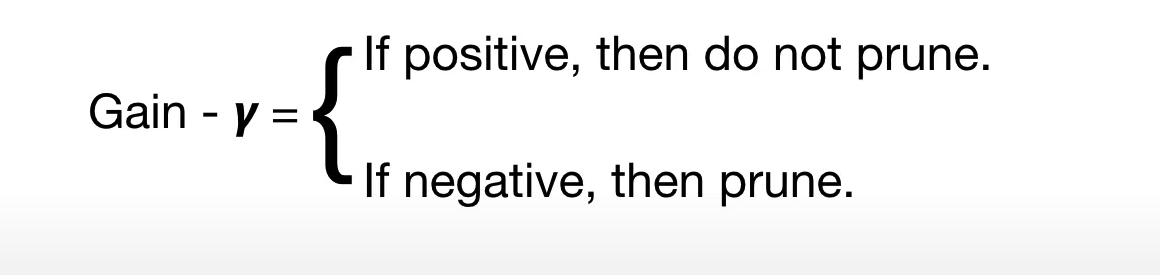

In [68]:
param_test_2 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 =GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, subsample=0.8, colsample_bytree=0.8, min_child_weight=1, objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27, tree_method='gpu_hist', max_depth=12), 
param_grid = param_test_2, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=12,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1, param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring='roc_auc')

In [69]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.1}, 0.8944051974527991)

Tiến hành train lại mô hình lần 2 sau khi thay đổi tham số mô hình, xem cải thiện đáng kể không




Model Report: 

Accuracy = 0.8605787826576181
ROC Area under Curve = 0.7529672342134845
Time taken = 3.266378402709961


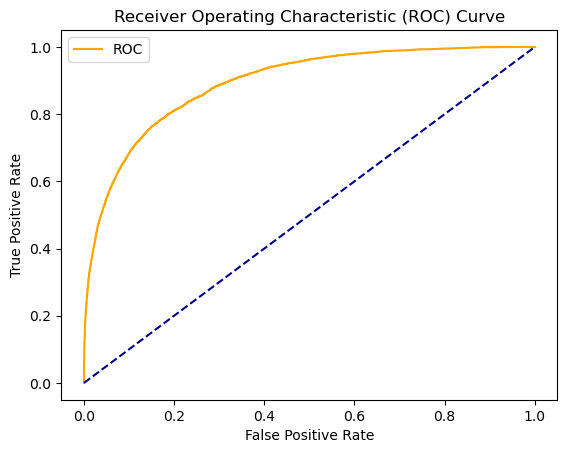

              precision    recall  f1-score   support

         0.0    0.88209   0.94719   0.91348     22098
         1.0    0.75223   0.55874   0.64121      6341

    accuracy                        0.86058     28439
   macro avg    0.81716   0.75297   0.77734     28439
weighted avg    0.85313   0.86058   0.85277     28439



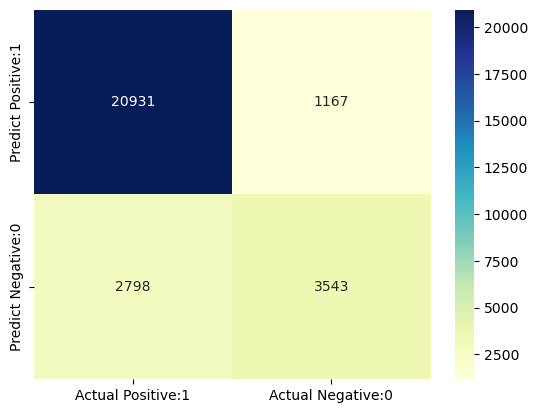

In [88]:
xgb2 = xgb.XGBClassifier(
    learning_rate =0.1,
    n_estimators=140,
    max_depth=12,
    min_child_weight=1,
    gamma= 0.4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27,
    tree_method='gpu_hist')
xgb2, accuracy_xgb2, roc_auc_xgb2, tt_xgb2 = run_model(xgb2, X_train, y_train, X_test, y_test)

Ở lần này, ta sẽ thay đổi `learning_rate` của mô hình để xem `learning_rate` ảnh hưởng đến mô hình nhiều hay không

In [78]:
param_test_3 = {
    'learning_rate':[0.001, 0.005, 0.01,0.05,0.1,0.3]
}
gsearch3 =GridSearchCV(estimator = xgb.XGBClassifier(n_estimators=140, subsample=0.8,gamma= 0.4, colsample_bytree=0.8, min_child_weight=1, objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27, tree_method='gpu_hist', max_depth=12), 
param_grid = param_test_2, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'learning_rate': 0.1}, 0.8940920041450194)

Ta thấy lr tốt nhất vẫn là 0.1 nên ta giữ nguyên.

# Model Khác

### Ada boost

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)





Model Report: 

Accuracy = 0.8401842540173705
ROC Area under Curve = 0.6992491112370668
Time taken = 29.770584106445312


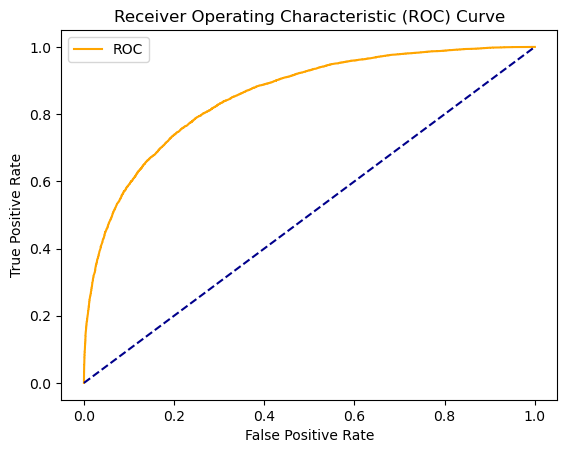

              precision    recall  f1-score   support

         0.0    0.85687   0.95362   0.90266     22098
         1.0    0.73349   0.44488   0.55384      6341

    accuracy                        0.84018     28439
   macro avg    0.79518   0.69925   0.72825     28439
weighted avg    0.82936   0.84018   0.82488     28439



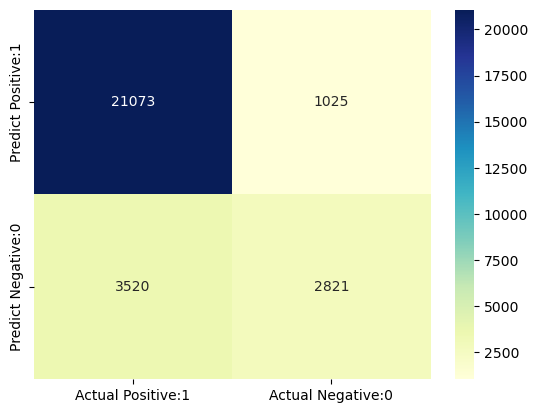

In [75]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=140, random_state=42, learning_rate=0.1)
ada, accuracy_ada, roc_auc_ada, tt_ada = run_model(ada, X_train, y_train, X_test, y_test)

### Ramdom Forest

/tmp/ipykernel_28/805244388.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)





Model Report: 

Accuracy = 0.8530890678293892
ROC Area under Curve = 0.7252078164407895
Time taken = 35.49398612976074


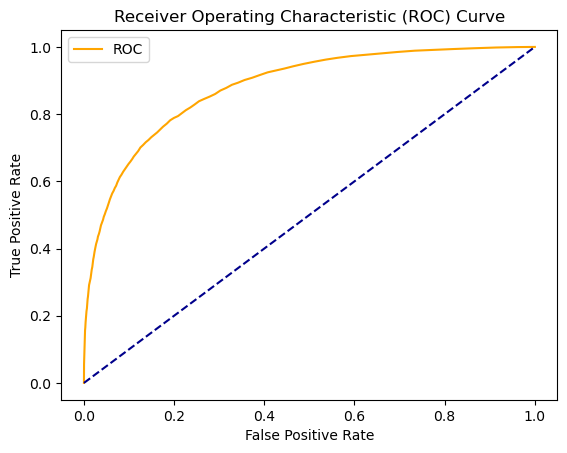

              precision    recall  f1-score   support

         0.0    0.86824   0.95601   0.91002     22098
         1.0    0.76333   0.49440   0.60011      6341

    accuracy                        0.85309     28439
   macro avg    0.81579   0.72521   0.75506     28439
weighted avg    0.84485   0.85309   0.84092     28439



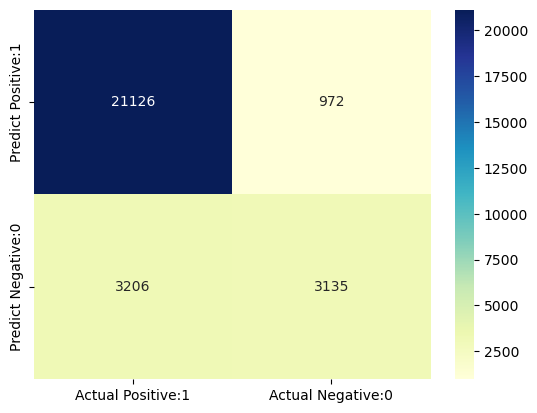

In [76]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=140, random_state=42)
rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(rf, X_train, y_train, X_test, y_test)

### Decision Tree




Model Report: 

Accuracy = 0.783817996413376
ROC Area under Curve = 0.6966016701077046
Time taken = 2.8203303813934326


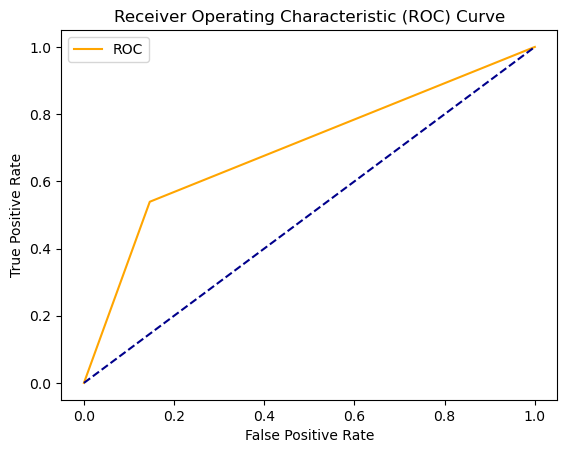

              precision    recall  f1-score   support

         0.0    0.86593   0.85401   0.85993     22098
         1.0    0.51452   0.53919   0.52657      6341

    accuracy                        0.78382     28439
   macro avg    0.69022   0.69660   0.69325     28439
weighted avg    0.78757   0.78382   0.78560     28439



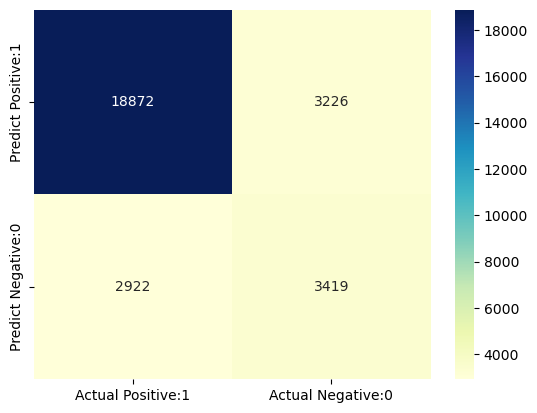

In [80]:

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
model_dt, accuracy_dt, roc_auc_dt, time_taken_dt = run_model(dt, X_train, y_train, X_test, y_test)

### logistic regression

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(





Model Report: 

Accuracy = 0.8457400049228173
ROC Area under Curve = 0.7265512285747983
Time taken = 3.5272929668426514


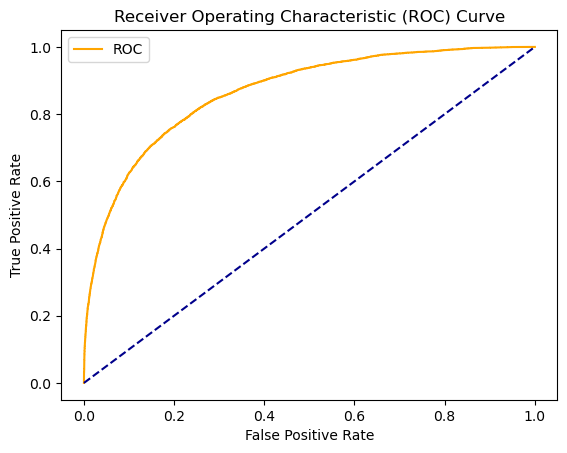

              precision    recall  f1-score   support

         0.0    0.87041   0.94167   0.90464     22098
         1.0    0.71558   0.51143   0.59652      6341

    accuracy                        0.84574     28439
   macro avg    0.79300   0.72655   0.75058     28439
weighted avg    0.83589   0.84574   0.83594     28439



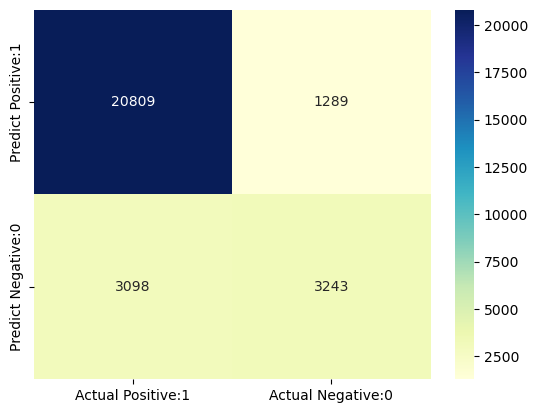

In [81]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
model_lr, accuracy_lr, roc_auc_lr, time_taken_lr = run_model(lr, X_train, y_train, X_test, y_test)

### KNN

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)





Model Report: 

Accuracy = 0.7966173212841521
ROC Area under Curve = 0.6356242002318271
Time taken = 20.879483938217163


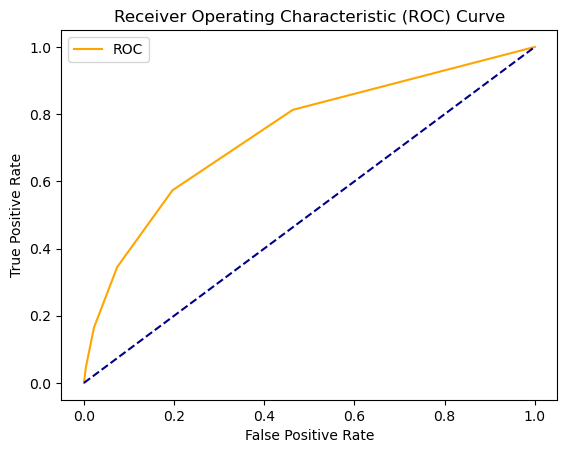

              precision    recall  f1-score   support

         0.0    0.83132   0.92619   0.87619     22098
         1.0    0.57292   0.34506   0.43071      6341

    accuracy                        0.79662     28439
   macro avg    0.70212   0.63562   0.65345     28439
weighted avg    0.77370   0.79662   0.77686     28439



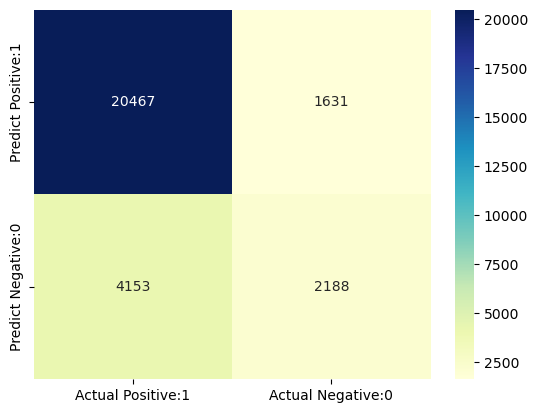

In [82]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier()
model_knn, accuracy_knn, roc_auc_knn, time_taken_knn = run_model(knn, X_train, y_train, X_test, y_test)

### Neural Network ANN:

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(





Model Report: 

Accuracy = 0.8452828861774324
ROC Area under Curve = 0.7435745180009812
Time taken = 233.08135867118835


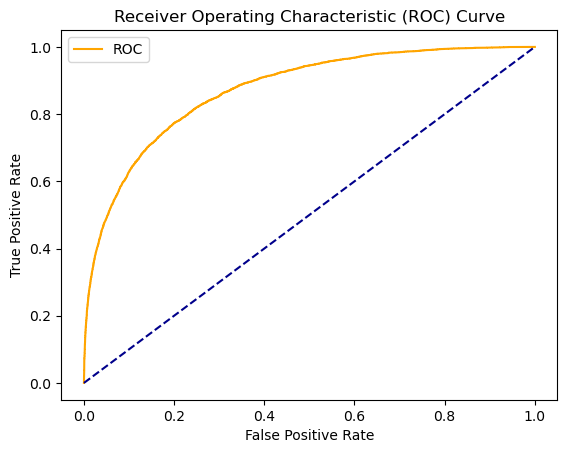

              precision    recall  f1-score   support

         0.0    0.88014   0.92714   0.90303     22098
         1.0    0.68804   0.56001   0.61746      6341

    accuracy                        0.84528     28439
   macro avg    0.78409   0.74357   0.76025     28439
weighted avg    0.83731   0.84528   0.83936     28439



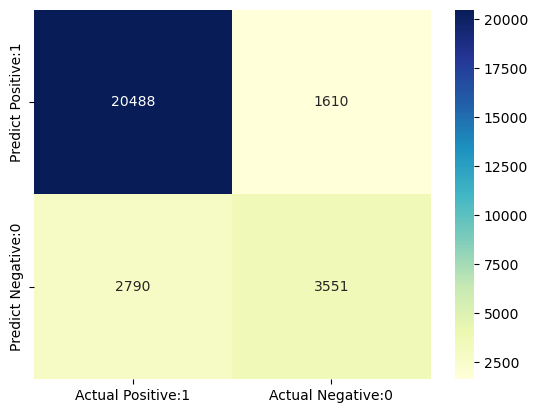

In [83]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
model_mlp, accuracy_mlp, roc_auc_mlp, time_taken_mlp = run_model(mlp, X_train, y_train, X_test, y_test)

In [94]:
accuracy_score= [accuracy_xgb2, accuracy_ada, accuracy_rf, accuracy_dt, accuracy_lr, accuracy_knn, accuracy_mlp]
roc_auc_score= [roc_auc_xgb2, roc_auc_ada, roc_auc_rf, roc_auc_dt, roc_auc_lr, roc_auc_knn, roc_auc_mlp]
time_taken= [tt_xgb2, tt_ada, tt_rf, time_taken_dt, time_taken_lr, time_taken_knn, time_taken_mlp]

model_data = {'Model': ['XGBoost', 'AdaBoost', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN', 'Neural Network'], "Accuracy": accuracy_score, "ROC_AUC": roc_auc_score, "Time Taken": time_taken}
data = pd.DataFrame(model_data)

In [96]:
data.head(10)

,Model,Accuracy,ROC_AUC,Time Taken
0,XGBoost,0.860579,0.752967,3.266378
1,AdaBoost,0.840184,0.699249,29.770584
2,Random Forest,0.853089,0.725208,35.493986
3,Decision Tree,0.783818,0.696602,2.820330
4,Logistic Regression,0.845740,0.726551,3.527293
5,KNN,0.796617,0.635624,20.879484
6,Neural Network,0.845283,0.743575,233.081359


## Sắp xếp theo thứ tự tăng dần của Time Taken

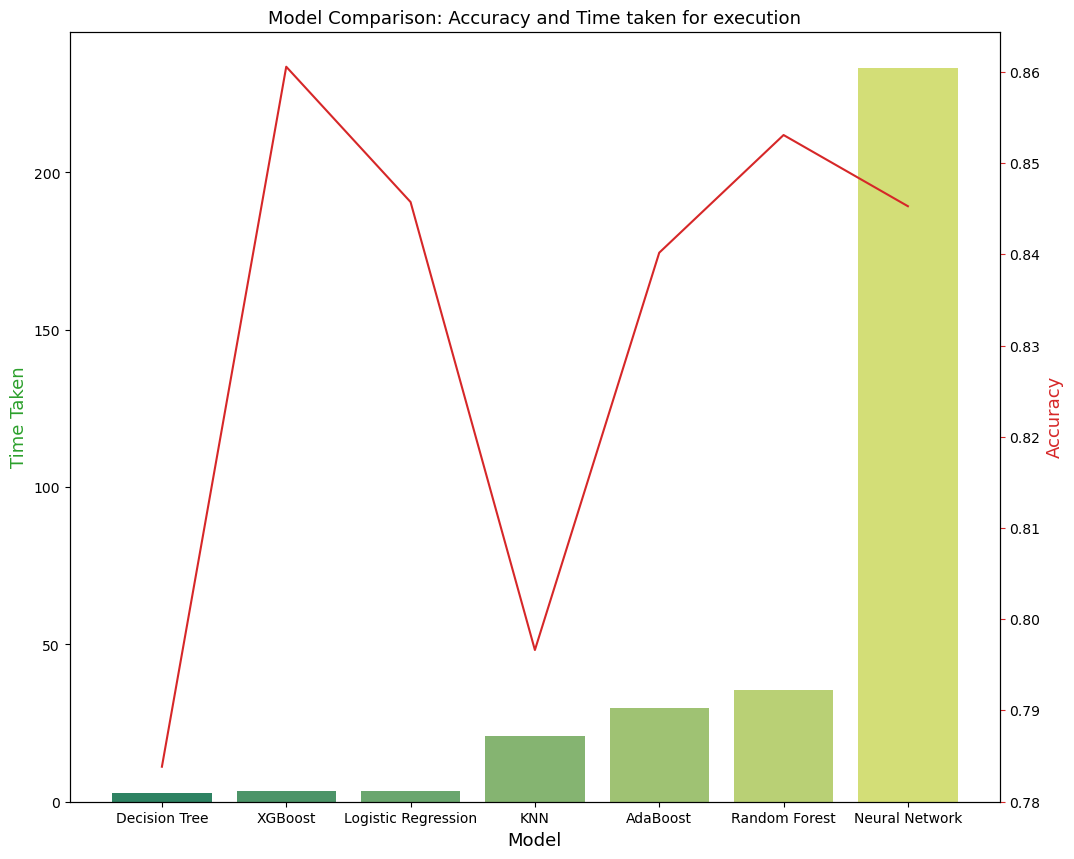

In [97]:

data.sort_values(by=['Time Taken'], inplace=True, ascending=True)
data.head(10)
fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time Taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time Taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
# Lưu hình ảnh
plt.savefig('model_comparison_time.png')

## Sắp xếp theo thứ tự tăng dần của ROC_AUC

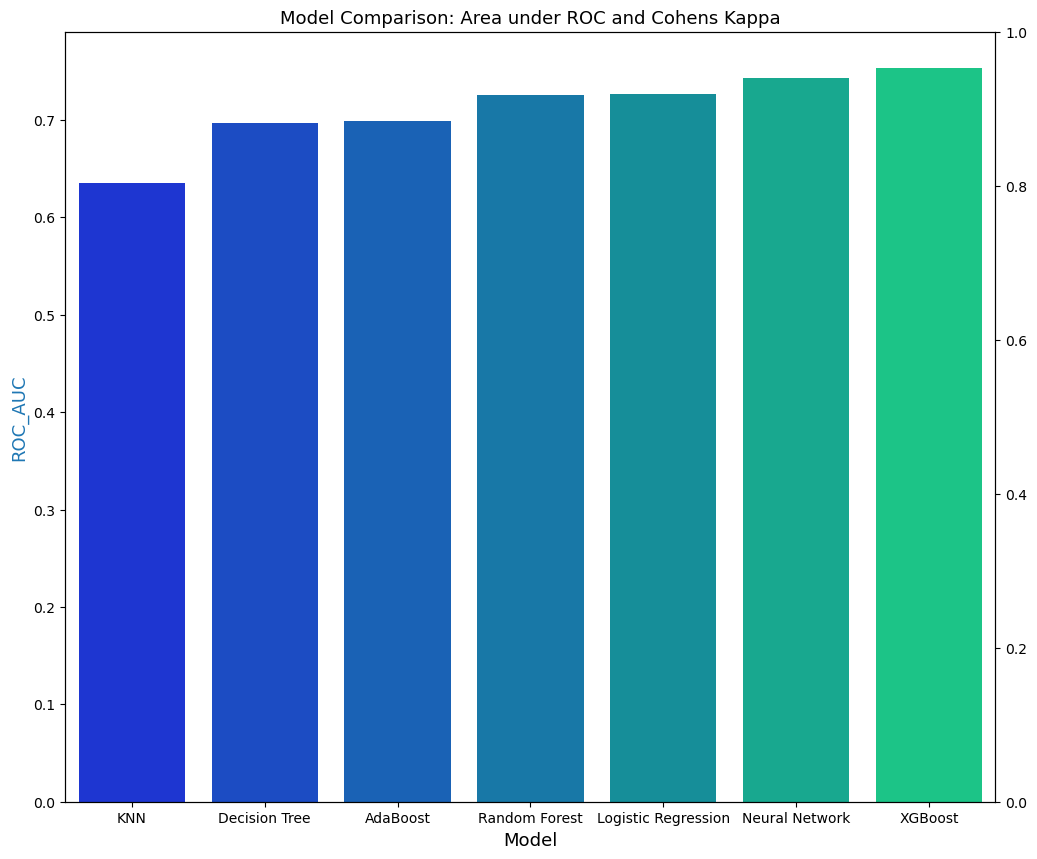

<Figure size 640x480 with 0 Axes>

In [98]:

data.sort_values(by=['ROC_AUC'], inplace=True, ascending=True)
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
plt.show()
# Lưu hình ảnh
plt.savefig('model_comparison_roc_auc.png')